In [1]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
affinefile = "/home/emilyjanedennis/Desktop/mouseann_to_rat_AFFINE.tif"
mouseratfile="/home/emilyjanedennis/Desktop/mouseann_to_rat.tif"

In [3]:
affine = tif.imread(affinefile)
mouserat = tif.imread(mouseratfile)

In [24]:
csvfilename="/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/PMA_ann.csv"
anns=pd.read_csv(csvfilename,usecols=[0,1],names=['id','abbr'])

In [25]:
df=anns

In [26]:
df.insert(2,'affine_vox',0)
df.insert(3,'mouserat_vox',0)

In [27]:
df

,id,abbr,affine_vox,mouserat_vox
0,1.0,TMv,0,0
1,2.0,SSp-m6b,0,0
2,4.0,IC,0,0
3,6.0,int,0,0
4,7.0,PSV,0,0
...,...,...,...,...
624,526322272.0,FRP6a,0,0
625,563807424.0,PoT,0,0
626,599626944.0,SCO,0,0
627,606826688.0,Pa4,0,0


In [28]:
for i in range(0,np.size(df['id'])-1):
    df.mouserat_vox[i] = np.size(mouserat[mouserat==df.id[i]])
    df.affine_vox[i] = np.size(affine[affine==df.id[i]])

<ipython-input-28-a1d2e4ee8e05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mouserat_vox[i] = np.size(mouserat[mouserat==df.id[i]])
<ipython-input-28-a1d2e4ee8e05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.affine_vox[i] = np.size(affine[affine==df.id[i]])


In [29]:
df.to_csv(r"/home/emilyjanedennis/Desktop/PMA_ann_mouserat_vox.csv")

In [30]:
df['change'] = df['affine_vox']-df['mouserat_vox']

In [33]:
df = df[df.mouserat_vox > 0]

In [34]:
dfpercent = df['change']/df['mouserat_vox']*100
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

<ipython-input-34-c65e6fae6b4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percent'] = dfpercent


0      -0.676530
1       0.574614
2       3.643001
3      13.871764
4     -17.536925
         ...    
611     3.562054
612     5.143128
613     9.543468
614   -22.222222
615    -7.132460
Length: 614, dtype: float64

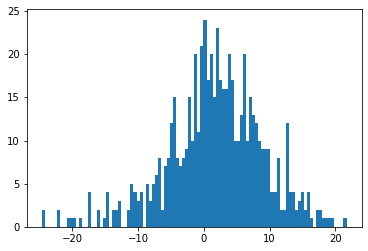

In [38]:
plt.hist(df.percent,bins=100)
plt.show()

In [39]:
mp = np.nanmedian(df.percent)
sp = np.nanstd(df.percent)

In [43]:
highmp = mp+sp
highmp

9.227998534211455

In [42]:
lowmp = mp-sp
lowmp

-5.347827327515767

In [44]:
df.to_csv(r"/home/emilyjanedennis/Desktop/percent.csv")

In [ ]:
df=pd.read_csv("/home/emilyjanedennis/Desktop/percent.csv")

In [45]:
df

,id,abbr,affine_vox,mouserat_vox,change,percent
0,1.0,TMv,36116,36362,-246,-0.676530
1,2.0,SSp-m6b,17503,17403,100,0.574614
2,4.0,IC,26686,25748,938,3.643001
3,6.0,int,276697,242990,33707,13.871764
4,7.0,PSV,141030,171022,-29992,-17.536925
...,...,...,...,...,...,...
611,10703.0,DG-mo,639534,617537,21997,3.562054
612,10704.0,DG-po,79852,75946,3906,5.143128
613,12345.0,PDTg,9022,8236,786,9.543468
614,12346.0,Pa5,14189,18243,-4054,-22.222222


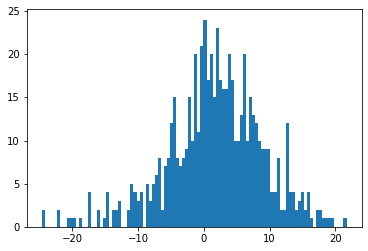

In [46]:
plt.hist(df.percent[df.affine_vox>5],bins=100)
plt.show()

In [47]:
too = df.id

In [48]:
mouserat_relative = mouserat

In [49]:
# add list of unique values not in twoxh/twoxl but in mouserat
x = np.unique(mouserat)
np.size(x)

57278

In [50]:
test = np.setdiff1d(x,too)
np.size(test)

56664

In [ ]:
for i in test:
    mouserat_relative[mouserat_relative==i]=0

In [ ]:
tif.imsave("/home/emilyjanedennis/Desktop/20200829_mouserat_zeros.tif",mouserat_relative)

In [ ]:
for i in too:
    mouserat_relative[mouserat_relative==i]=df.loc[df['id']==i,'percent'].iloc[0]

In [ ]:
tif.imsave("/home/emilyjanedennis/Desktop/mouserat_relative.tif",mouserat_relative)